# Understanding the difference between Python and pandas date tools

The *datatime* module provides three distince date types: *date*, *time*, *datetime*  
> date: June 7, 2013  
> time: 12 hours and 30 minutes  
> datetime: consists of both date and time  

pandas has a single object to encapsulate date and time: *Timestamp*  

Both Python and pandas each have a timedelta object that is useful when doing date addition/subtraction

In [1]:
import datetime

date = datetime.date(year=2013, month=6, day=7)
time = datetime.time(hour=12, minute=30, second=20, microsecond=123456)
dt = datetime.datetime(
    year=2013, month=6, day=7,
    hour=12, minute=30, second=20, microsecond=123456
)

In [2]:
print('date is: ', date)
print('time is: ', time)
print('datetime is: ', dt)

date is:  2013-06-07
time is:  12:30:20.123456
datetime is:  2013-06-07 12:30:20.123456


In [3]:
td = datetime.timedelta(weeks=2, days=5, hours=10, minutes=20, seconds=6.73, milliseconds=99, microseconds=8)

In [4]:
print('time delta is: ', td)

time delta is:  19 days, 10:20:06.829008


In [5]:
print('new date is: ', date + td)
print('new datetime is ', dt + td)

new date is:  2013-06-26
new datetime is  2013-06-26 22:50:26.952464


Add a **timedelta** to a **time** object is not possible.

In [6]:
import pandas as pd
import numpy as np

In [7]:
pd.Timestamp(
    year=2012, 
    month=12, 
    day=21, 
    hour=5,
    minute=10, 
    second=8, 
    microsecond=99
)

Timestamp('2012-12-21 05:10:08.000099')

In [8]:
pd.Timestamp('2016/10/09')

Timestamp('2016-10-09 00:00:00')

In [9]:
pd.Timestamp('2016-10-09')

Timestamp('2016-10-09 00:00:00')

In [10]:
pd.Timestamp('2016-10/09')

Timestamp('2016-10-09 00:00:00')

In [11]:
pd.Timestamp('2016 10 09')

Timestamp('2016-10-09 00:00:00')

In [12]:
pd.Timestamp('Jan 3, 2019 20:45:56')

Timestamp('2019-01-03 20:45:56')

In [13]:
pd.Timestamp('2016-01-05T05:34:43.123456789')

Timestamp('2016-01-05 05:34:43.123456789')

Pandas provides the to_datetime function that works fairly similarly to the Timestamp constructor, but comes with a few different parameters for special situations

In [14]:
pd.to_datetime('2015-9-10')

Timestamp('2015-09-10 00:00:00')

In [15]:
pd.to_datetime('2015-15-10', dayfirst=True)
# Problem when day less than 12

Timestamp('2015-10-15 00:00:00')

In [16]:
pd.to_datetime(100, unit='D', origin='2013-1-1')
# default unit = 'ns' nanoseconds

Timestamp('2013-04-11 00:00:00')

In [17]:
s_1 = pd.Series([10,100,1000,10000])
pd.to_datetime(s_1, unit='D', origin='2018-1-1')

0   2018-01-11
1   2018-04-11
2   2020-09-27
3   2045-05-19
dtype: datetime64[ns]

In [18]:
s_2 = pd.Series(['12-5-2015', '14-1-2013','20/12/2017', '40/23/2017'])
pd.to_datetime(s_2, dayfirst=True, errors='ignore')
# error can be 'ignore', 'coerce'. default 'raise'

0     12-5-2015
1     14-1-2013
2    20/12/2017
3    40/23/2017
dtype: object

In [19]:
pd.Timedelta('12 days 5 hours 3 minutes 123456789 nanoseconds')

Timedelta('12 days 05:03:00.123456')

In [20]:
pd.Timedelta(days=5, minutes=7.34)

Timedelta('5 days 00:07:20.400000')

In [21]:
pd.Timedelta(100, unit='W')

Timedelta('700 days 00:00:00')

In [22]:
ts = pd.Timestamp('2016-10-16 4:23:45.10')
ts

Timestamp('2016-10-16 04:23:45.100000')

In [23]:
ts.ceil('h')

Timestamp('2016-10-16 05:00:00')

In [24]:
ts.year, ts.month, ts.day, ts.hour, ts.minute, ts.second

(2016, 10, 16, 4, 23, 45)

In [25]:
ts.dayofweek, ts.dayofyear, ts.daysinmonth

(6, 290, 31)

In [26]:
ts.to_pydatetime()

datetime.datetime(2016, 10, 16, 4, 23, 45, 100000)

The datetime module is part of the Python standard library, and is very popular and widely used. For this reason, it is a good idea to have some familiarity with it, as you will likely cross paths with it. The datetime module is actually fairly simple with a total of only six types of objects: date, time, datetime, timedelta along with two others on timezones. The pandas Timestamp and Timedelta objects have all the functionality of their datetime module counterparts and more. It will be possible to remain completely in pandas when working with time series.  

> Another one of these parameters available only to to_datetime is format, which is particularly useful whenever a string contains a particular date pattern that is not automatically recognized by pandas

#### With the format parameter, we can specify the exact date format, so that pandas doesn't have to search for the correct one each time.

In [27]:
date_string_list = ['Sep 30 1984'] * 10000

In [28]:
%timeit pd.to_datetime(date_string_list, format='%b %d %Y')

35.2 ms ± 3.07 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
%timeit pd.to_datetime(date_string_list)

1.09 s ± 30.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Slicing time series intelligently

One of the many nice features of hdf5 files is their ability to preserve the data types of each column, which substantially reduces the memory needed.

In [30]:
crime = pd.read_hdf('./data/crime.h5', 'crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [31]:
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [36]:
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [37]:
crime.loc['2014-06-29 02:01:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:01:00,police-false-information,all-other-crimes,-105.000149,39.745753,cbd,1,0


In [44]:
crime.loc['2014-06-29'].head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [51]:
crime.loc['2014'].shape

(84421, 7)

In [50]:
crime.loc['2014-08'].shape

(7815, 7)

In [49]:
crime.loc['Dec 2015'].shape

(6907, 7)

In [52]:
crime.loc['2015 Dec, 15'].shape

(175, 7)

In [56]:
crime.loc['2015-1-1':'2016-1-1'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-01-01 00:43:00,traffic-accident,traffic-accident,-104.995025,39.751087,union-station,0,1
2015-01-01 01:03:00,assault-dv,other-crimes-against-persons,-104.874261,39.654472,hampden,1,0
2015-01-01 01:20:00,criminal-mischief-other,public-disorder,-104.993289,39.754157,five-points,1,0
2015-01-01 01:20:00,threats-to-injure,public-disorder,-104.993289,39.754157,five-points,1,0
2015-01-01 01:32:00,criminal-trespassing,all-other-crimes,-104.994680,39.744222,cbd,1,0
2015-01-01 01:38:00,traffic-accident,traffic-accident,-105.001535,39.747831,auraria,0,1
2015-01-01 01:43:00,traffic-accident,traffic-accident,-104.995870,39.751749,union-station,0,1
2015-01-01 01:43:00,traf-habitual-offender,all-other-crimes,-104.989599,39.737768,civic-center,1,0
2015-01-01 01:49:00,traffic-accident-hit-and-run,traffic-accident,-104.940508,39.779951,northeast-park-hill,0,1


In [57]:
crime.loc['2015-1-1 06:00:00':'2016-1-1 06:00:00'].sort_index()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2015-01-01 06:15:00,traffic-accident-hit-and-run,traffic-accident,-105.039967,39.703696,westwood,0,1
2015-01-01 07:09:00,traffic-accident,traffic-accident,-104.959402,39.772893,cole,0,1
2015-01-01 07:20:00,false-imprisonment,all-other-crimes,-105.021536,39.732225,sun-valley,1,0
2015-01-01 07:20:00,assault-dv,other-crimes-against-persons,-105.021536,39.732225,sun-valley,1,0
2015-01-01 07:20:00,assault-simple,other-crimes-against-persons,-105.021536,39.732225,sun-valley,1,0
2015-01-01 07:39:00,criminal-mischief-other,public-disorder,-104.919983,39.675750,goldsmith,1,0
2015-01-01 07:42:00,disturbing-the-peace,public-disorder,-105.014825,39.762275,highland,1,0
2015-01-01 07:42:00,criminal-mischief-other,public-disorder,-105.014825,39.762275,highland,1,0
2015-01-01 07:42:00,assault-dv,other-crimes-against-persons,-105.014825,39.762275,highland,1,0


In [58]:
%timeit crime.loc['2015-3-4':'2016-1-1']

35.3 ms ± 996 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [60]:
crime_sort = crime.sort_index()
%timeit crime_sort.loc['2015-3-4':'2016-1-1']

665 µs ± 3.12 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# Using methods that only work with a DatetimeIndex

In [61]:
crime = pd.read_hdf('./data/crime.h5', 'crime').set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [63]:
type(crime.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [64]:
crime.between_time('2:00', '5:00', include_end=False).head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0
2014-06-29 04:22:00,violation-of-restraining-order,all-other-crimes,-104.972447,39.739449,cheesman-park,1,0


In [66]:
crime.at_time('5:00').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-03-21 05:00:00,assault-dv,other-crimes-against-persons,-105.022173,39.732648,sun-valley,1,0
2014-03-21 05:00:00,disturbing-the-peace,public-disorder,-105.022173,39.732648,sun-valley,1,0
2014-09-28 05:00:00,robbery-street,robbery,-105.031010,39.707926,westwood,1,0
2015-08-24 05:00:00,traffic-accident,traffic-accident,-104.903433,39.778300,stapleton,0,1
2012-11-10 05:00:00,theft-items-from-vehicle,theft-from-motor-vehicle,-105.033020,39.736043,west-colfax,1,0


In [67]:
crime_sort = crime.sort_index()
crime_sort.first(pd.offsets.MonthBegin(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [68]:
crime_sort.first(pd.offsets.MonthEnd(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


In [69]:
crime_sort.first(pd.offsets.MonthBegin(6, normalize=True))
# = crime_sort.loc[:'2016:06]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
2012-01-02 02:39:00,aggravated-assault,aggravated-assault,-105.001480,39.770655,sunnyside,1,0
2012-01-02 03:30:00,assault-simple,other-crimes-against-persons,-104.876943,39.702783,windsor,1,0
2012-01-02 04:07:00,criminal-mischief-other,public-disorder,-104.905646,39.771597,northeast-park-hill,1,0
2012-01-02 04:46:00,robbery-street,robbery,-104.932636,39.730927,hale,1,0


# Counting the number of weekly crimes

In [76]:
crime_sort.resample('M')
# 

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

In [77]:
weekly_crimes = crime_sort.resample('M').size()
weekly_crimes.head()

REPORTED_DATE
2012-01-31    4229
2012-02-29    3977
2012-03-31    4395
2012-04-30    4661
2012-05-31    5148
Freq: M, dtype: int64

In [78]:
weekly_crime_gby = crime_sort.groupby(pd.Grouper(freq='M')).size()
weekly_crime_gby.head()

REPORTED_DATE
2012-01-31    4229
2012-02-29    3977
2012-03-31    4395
2012-04-30    4661
2012-05-31    5148
Freq: M, dtype: int64

In [79]:
weekly_crime_gby.equals(weekly_crimes)

True

**resample** method by defalut works implicitly with a DatetimeIndex.  
The first parameter to reasmple is the *rule* determining how the Timestamps in the index will be grouped. we can use offset alias like 'W', 'M' etc.  
we can use *size* method to count the number of crimes per Month or Week.

It is possible to use resample even when the index does not contain a Timestamp. We can use the **on** parameter to select the column with Timestamps that will be used to form groups.

In [82]:
crime = pd.read_hdf('./data/crime.h5', 'crime')
weekly_crimes_2 = crime.resample('M', on='REPORTED_DATE').size()
weekly_crimes_2.head()

REPORTED_DATE
2012-01-31    4229
2012-02-29    3977
2012-03-31    4395
2012-04-30    4661
2012-05-31    5148
Freq: M, dtype: int64

In [83]:
weekly_crimes.equals(weekly_crimes_2)

True

In [84]:
weekly_crimes_gby2 = crime.groupby(
    pd.Grouper(
        key='REPORTED_DATE',
        freq='M'
    )
).size()

In [85]:
weekly_crimes_gby2.equals(weekly_crimes_2)

True

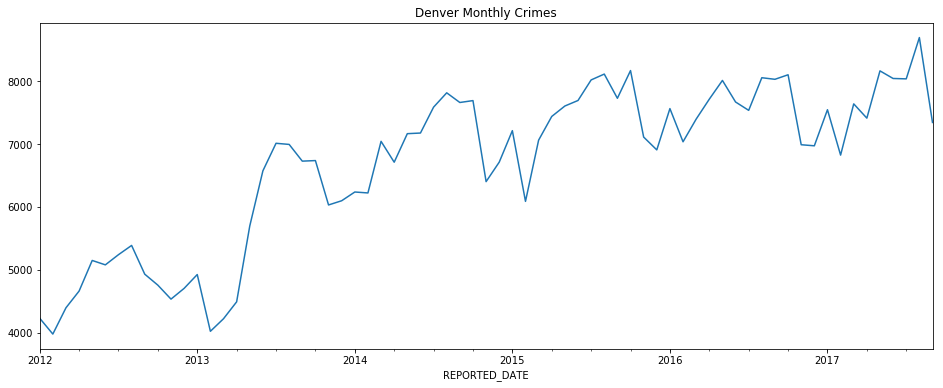

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline

weekly_crimes.plot(figsize=(16,6), title='Denver Monthly Crimes')

# Aggregating weekly crime and traffic accidents separately

In [93]:
crime_sort = pd.read_hdf('data/crime.h5', 'crime') \
                   .set_index('REPORTED_DATE') \
                   .sort_index()

In [95]:
crime_quarterly = crime_sort.resample('Q')['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly.head()

# Q = end of quarter of year

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [96]:
crime_quarterly = crime_sort.resample('QS')['IS_CRIME', 'IS_TRAFFIC'].sum()
crime_quarterly.head()

# QS = start of quarter of year

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


In [97]:
crime_sort.loc['2012-4-1':'2012-6-30', ['IS_CRIME', 'IS_TRAFFIC']].sum()

IS_CRIME      9641
IS_TRAFFIC    5255
dtype: int64

In [98]:
# replicate above operation by using groupby method.
crime_quarterly_2 = crime_sort.groupby(
    pd.Grouper(
        freq='QS'
    )
)['IS_CRIME', 'IS_TRAFFIC'].sum()

In [99]:
crime_quarterly_2.equals(crime_quarterly)

True

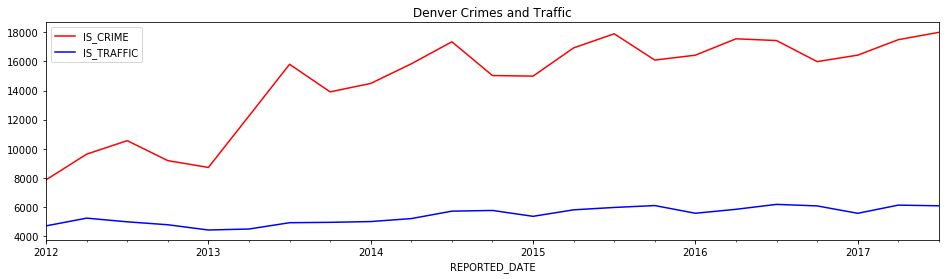

In [100]:
plot_kwargs = dict(
    figsize=(16,4),
    color=['red', 'blue'],
    title='Denver Crimes and Traffic'
)
crime_quarterly.plot(**plot_kwargs)

# Measuring crime by weekday and year

In [101]:
crime = pd.read_hdf('./data/crime.h5', 'crime')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
0,traffic-accident-dui-duid,traffic-accident,2014-06-29 02:01:00,-105.000149,39.745753,cbd,0,1
1,vehicular-eluding-no-chase,all-other-crimes,2014-06-29 01:54:00,-104.884660,39.738702,east-colfax,1,0
2,disturbing-the-peace,public-disorder,2014-06-29 02:00:00,-105.020719,39.706674,athmar-park,1,0
3,curfew,public-disorder,2014-06-29 02:18:00,-105.001552,39.769505,sunnyside,1,0
4,aggravated-assault,aggravated-assault,2014-06-29 04:17:00,-105.018557,39.679229,college-view-south-platte,1,0


In [103]:
wd_counts = crime['REPORTED_DATE'].dt.weekday_name.value_counts()
wd_counts

Monday       70024
Friday       69621
Wednesday    69538
Thursday     69287
Tuesday      68394
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

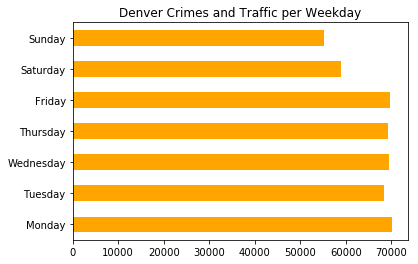

In [107]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
title = 'Denver Crimes and Traffic per Weekday'
wd_counts.reindex(days).plot(kind='barh', title=title, color='orange')

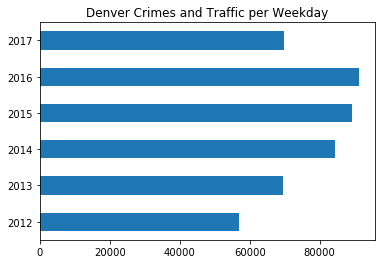

In [108]:
crime['REPORTED_DATE'].dt.year.value_counts().sort_index().plot(kind='barh', title=title)

In [111]:
# both weekday and year are pandas Series, can use value_counts() method

weekday = crime['REPORTED_DATE'].dt.weekday_name
year = crime['REPORTED_DATE'].dt.year

In [113]:
crime_wd_year = crime.groupby([year, weekday]).size()
crime_wd_year.head(14)

REPORTED_DATE  REPORTED_DATE
2012           Friday            8549
               Monday            8786
               Saturday          7442
               Sunday            7189
               Thursday          8440
               Tuesday           8191
               Wednesday         8440
2013           Friday           10380
               Monday           10627
               Saturday          8875
               Sunday            8444
               Thursday         10431
               Tuesday          10416
               Wednesday        10354
dtype: int64

In [115]:
crime_table = crime_wd_year.rename_axis(['Year', 'WeekDay']).unstack('WeekDay')
crime_table

WeekDay,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Year,,,,,,,
2012,8549,8786,7442,7189,8440,8191,8440
2013,10380,10627,8875,8444,10431,10416,10354
2014,12683,12813,10950,10278,12309,12440,12948
2015,13273,13452,11586,10624,13512,13381,13320
2016,14059,13708,11467,10554,14050,13338,13900
2017,10677,10638,8514,8124,10545,10628,10576
